Let's explore numpy arrays and images by making an image of a basketball bounce around. We'll do this by making a large black image as our background, then paste in a small image of a basketball (called a "sprite"). We will repeat this process, moving the location of the sprite to simulate a ball bouncing off the edges of the black background. 

We will start by mounting our dataset of images and video.

In [2]:
from google.colab import drive
#import matplotlib.pyplot as plt
from IPython import display
import cv2
from google.colab.patches import cv2_imshow
drive.mount('/content/drive')

Mounted at /content/drive


Next we will load the image we will use as our sprite, and resize it so it's small enough to fit in our display.

TO DO AND NOTICE: 
1. Change the size of the sprite (spriteX,spriteY).
2. Use an image of plankton instead of the image of the basketball. You can find images of plankton in the "/content/drive/MyDrive/SCIP_DATA/Images/TEST_IMAGE/" directory.





In [4]:
import random
import numpy as np

spriteX=50; spriteY=50

##################################### IMAGE STUFF ######################################
print('start program')

#loading image
ball = r'/content/drive/MyDrive/SCIP_DATA/Images/basketball.jpg' 
colorIM = cv2.imread(ball) #Read the colored image
print('colorIM shape',colorIM.shape)
spriteIM=cv2.resize(colorIM,(spriteX,spriteY))
cv2_imshow(colorIM)
cv2_imshow(spriteIM)


start program


AttributeError: ignored

Now we will create the background as a large two-dimensional array, where each cell of the array represents the brighness of a pixel, with 0=black, 255=white, and every value in between (1-254) shades of gray. Then we will paste the sprite into the image by copying the sprite image, pixel by pixel, into the background array at location x0,y0.

TO DO AND NOTICE: 
3.   Print the size of displayIM[y0:y0+spriteY,x0:x0+spriteX,:] and the size of spriteIM  using the foo.shape  command (where foo is the array). Notice that they are both the same.
4.  What happens if the they are different, for example by adding 1 to the width, as in displayIM[y0:y0+spriteY+1,x0:x0+spriteX,:] = spriteIM
5. Change the code so any image of any size can be inserted. Hint: Before you insert the image, determine the size with foo.shape. 
6. Make the background white.
7. Make the background green.
8. Make the background blue.




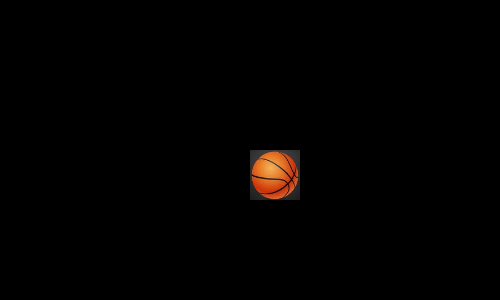

In [ ]:
import matplotlib.image as mpimg 
from matplotlib.pyplot import imshow

xRez=500; yRez=300; COLOR_CHANNELS=3  # black background dimensions
x0=250; y0=150;   # location of sprite in background

# create black background
displayIM=np.zeros((yRez,xRez,COLOR_CHANNELS),dtype='uint8') # black display

# insert sprite into background at location spriteX,spriteY
displayIM[y0:y0+spriteY,x0:x0+spriteX,:] = spriteIM  # paste sprite image into black display
cv2_imshow(displayIM)

To animate the ball (make it look like it's moving), we will "erase" the sprite from the current location by reloading a copy of the black background,  then reload (write) the sprite into the array at a new location. BTW we reload the black background array instead of recreating it because the former is faster, although both methods will work.

TO DO AND NOTICE: 
9. Notice there are four separate images displayed. Make one display that shows all four sprites on one black background.



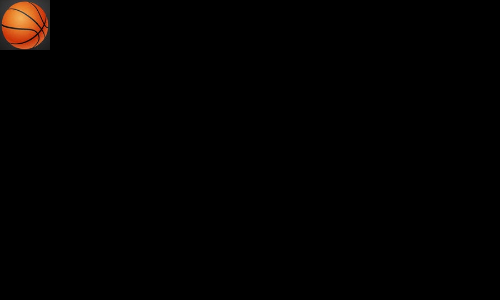

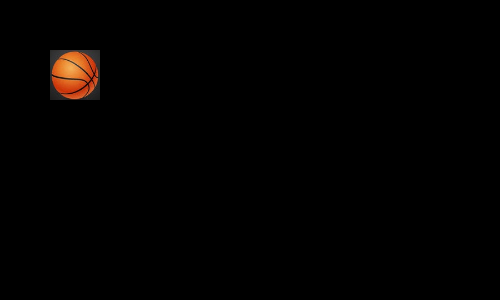

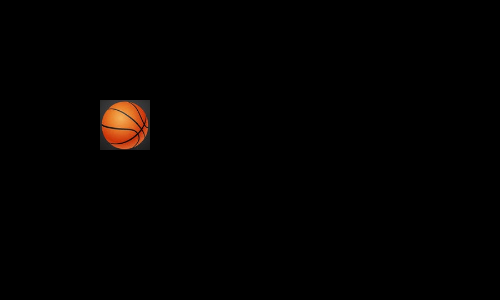

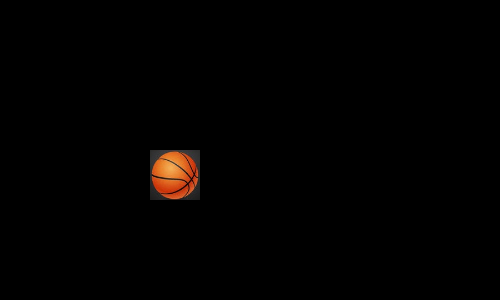

In [ ]:
displayBlackIM=np.zeros((yRez,xRez,COLOR_CHANNELS),dtype='uint8') # black display

displayIM=np.copy(displayBlackIM) # get a copy of the black background
x0=0; y0=0; # initial location of ball
displayIM[y0:y0+spriteY,x0:x0+spriteX,:] = spriteIM  # paste sprite image into black display
cv2_imshow(displayIM)

displayIM=np.copy(displayBlackIM) # get a copy of the black background
x0=50; y0=50; # initial location of ball
displayIM[y0:y0+spriteY,x0:x0+spriteX,:] = spriteIM  # paste sprite image into black display
cv2_imshow(displayIM)

displayIM=np.copy(displayBlackIM) # get a copy of the black background
x0=100; y0=100; # initial location of ball
displayIM[y0:y0+spriteY,x0:x0+spriteX,:] = spriteIM  # paste sprite image into black display
cv2_imshow(displayIM)

displayIM=np.copy(displayBlackIM) # get a copy of the black background
x0=150; y0=150; # initial location of ball
displayIM[y0:y0+spriteY,x0:x0+spriteX,:] = spriteIM  # paste sprite image into black display
cv2_imshow(displayIM)


Instead of hard coding the movement of the basketball, which produces three separate frame outputs, we will use a loop to move the basketball by writing the image into the array at different locations, and clear the display after each write, to make a single display that gives the appearance of the ball moving.



In [ ]:
from time import sleep

CYCLES=10 # number of times to move sprite

# starting location and movement direction
x0=10; y0=10; # ball starting position
step=20 # how much we move sprite each frame

for i in range(CYCLES):    
    # increment moveX and moveY to move the sprite
    x0+=step 
    y0+=step
   
    # move image
    displayIM=np.zeros((yRez,xRez,COLOR_CHANNELS),dtype='uint8') # black display
    displayIM[y0:y0+spriteY,x0:x0+spriteX,:] = spriteIM  # paste sprite image into black display
    cv2_imshow(displayIM)
    sleep(.5) # delay so we can see the image (in seconds)
    display.clear_output(wait=True)
   
print("Reached end of animation")

Reached end of animation


Now we will move the sprite and test each loop to see if the sprite is going to exceed the size of the image array, that is try and write beyond the boundary of the background image. If so, we will change the direction of the movement by reversing the sign of the increment (e.g., instead of adding the increment, we will subtract it). This will give the apperance of the ball bouncing off the boundary of the backgroud image. 

TO DO AND NOTICE:
10. Make the ball increases in size each time is bounced off a wall.
11. Make the ball increases in size each with each cycle of the animation.
12. Make the animation end after the sprite hits the walls 4 times.

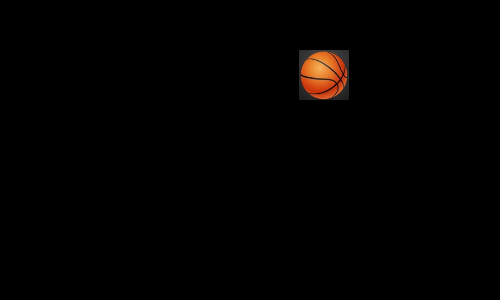

In [ ]:
stepSize=5
x0=100; y0=50;  
moveX=stepSize; moveY=stepSize
CYCLES=100

displayBlackIM=np.zeros((yRez,xRez,COLOR_CHANNELS),dtype='uint8') # black display
    
#move image each loop, testing if hitting display boundary
for i in range(CYCLES):          
    # move image
    x0 += moveX
    y0 += moveY
    
    # change random directions if hit display boundary
    if x0 < 0:
        moveX = stepSize # make the increment positive
        x0=0
    if y0<0:
        moveY = stepSize  # make the increment positive
        y0=0
    if x0+spriteX>=xRez:
        moveX = -stepSize  # make the increment negative
        x0=xRez-spriteX-1
    if y0+spriteY>=yRez:
        moveY = -stepSize  # make the increment negative
        y0=yRez-spriteY-1
    
    # move image
    displayIM=np.copy(displayBlackIM)
    displayIM[y0:y0+spriteY,x0:x0+spriteX,:] = spriteIM  # paste sprite image into black display
    cv2_imshow(displayIM)
    sleep(0.1) # delay so we can see the image
    display.clear_output(wait=True)
    

To make it more interesting, when the ball hits the edge of the background image, we will change the x and y increments to random numbers (within a reasonable range), so it bounces in different directions and speeds.

TO DO AND NOTICE:
13. Make the background flash red for one cycle when the sprite touches a wall.
14. Everytime the sprite hits a wall, change the background to a random color.



In [1]:
minRange=5 # limits the range of direction and speed changes
maxRange=20

x0=200; y0=100; # starting position  
moveX=minRange; moveY=minRange # initial increment values
CYCLES=200

displayBlackIM=np.zeros((yRez,xRez,COLOR_CHANNELS),dtype='uint8') # black display
    
#move image each loop, testing if hitting display boundary
for i in range(CYCLES):          
    # move image
    x0 += moveX
    y0 += moveY
    
    # change random directions if hit display boundary
    if x0 < 0:
        moveX = random.randint(minRange,maxRange) # make the increment positive
        x0=0
    if y0<0:
        moveY = random.randint(minRange,maxRange) # make the increment positive
        y0=0
    if x0+spriteX>=xRez:
        moveX = -random.randint(minRange,maxRange) # make the increment negative
        x0=xRez-spriteX-1
    if y0+spriteY>=yRez:
        moveY = -random.randint(minRange,maxRange) # make the increment negative
        y0=yRez-spriteY-1
    
    # move image
    displayIM=np.copy(displayBlackIM)
    displayIM[y0:y0+spriteY,x0:x0+spriteX,:] = spriteIM  # paste sprite image into black display
    cv2_imshow(displayIM)
    sleep(0.1) # delay so we can see the image
    display.clear_output(wait=True)
    

NameError: ignored